<a href="https://colab.research.google.com/github/Bertaalcolea/Collagen_studies/blob/main/estudio(5-12)ionic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_excel(next(iter(uploaded)))
df.head()



Saving Collgen_NaCl_KCl_Study2.xlsx to Collgen_NaCl_KCl_Study2.xlsx


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Software Version,1.04.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Experiment File Path:,C:\Users\Plate Reader\Desktop\Wagner Lab\Berta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Plate Number,Plate 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Date,2025-12-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.columns


Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26'],
      dtype='object')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# =========================================================
# 1. CARGAR EXCEL DEL LECTOR (ya subido con files.upload())
# =========================================================
raw = pd.read_excel(next(iter(uploaded)), header=None)

# =========================================================
# 2. PARSEAR BLOQUES "350 - Time X (HH:MM:SS)" → formato largo
#    Solo va a coger los pozos 7–12 (que son los de este experimento)
# =========================================================
time_rows = raw.index[raw[0].astype(str).str.startswith("350 - Time", na=False)].tolist()

records = []

for t_idx in time_rows:
    # --- tiempo en minutos ---
    time_str = str(raw.iloc[t_idx, 0])   # ej: '350 - Time 1 (0:00:12)'
    m = re.search(r"\((\d+):(\d+):(\d+)\)", time_str)
    if m:
        h, mm, ss = map(int, m.groups())
        time_min = h*60 + mm + ss/60
    else:
        time_min = np.nan

    # --- buscar la fila de cabecera (1–12) justo después del "350 - Time..." ---
    header_row = None
    for r in range(t_idx+1, min(t_idx+20, len(raw))):
        vals = raw.iloc[r].tolist()
        nums = []
        for v in vals:
            if isinstance(v, (int, float)) and not pd.isna(v):
                nums.append(int(v))
            elif isinstance(v, str) and v.isdigit():
                nums.append(int(v))
        if set(range(1, 13)).issubset(set(nums)):
            header_row = r
            break
    if header_row is None:
        continue

    header = raw.iloc[header_row]

    # columnas donde están los números de pozo (aquí 7–12)
    well_cols = []
    for j, v in enumerate(header):
        if isinstance(v, (int, float)) and not pd.isna(v) and int(v) in range(7, 13):
            well_cols.append(j)
        elif isinstance(v, str) and v.isdigit() and int(v) in range(7, 13):
            well_cols.append(j)

    # --- filas A–H justo debajo de la cabecera ---
    for offset in range(1, 9):  # 8 filas A–H
        rr = header_row + offset
        if rr >= len(raw):
            break
        row_label = raw.iloc[rr, 1]    # la letra A–H está en la columna 1
        if row_label not in list("ABCDEFGH"):
            continue

        for j in well_cols:
            col_num = int(raw.iloc[header_row, j])  # número de pozo (7–12)
            od = raw.iloc[rr, j]
            if pd.isna(od):
                continue
            records.append({
                "time_min": time_min,
                "row": row_label,
                "col": col_num,
                "OD": float(od),
            })

long_df = pd.DataFrame(records)
long_df["well"] = long_df["row"] + long_df["col"].astype(str)

print(long_df.head())
print("Nº de filas:", len(long_df))
print("Pozos únicos:", long_df[["row","col"]].drop_duplicates())


   time_min row  col     OD well
0       0.2   A    7  0.174   A7
1       0.2   A    8  0.175   A8
2       0.2   A    9  0.176   A9
3       0.2   A   10  0.177  A10
4       0.2   A   11  0.175  A11
Nº de filas: 5445
Pozos únicos:    row  col
0    A    7
1    A    8
2    A    9
3    A   10
4    A   11
5    A   12
6    B    7
7    B    8
8    B    9
9    B   10
10   B   11
11   B   12
12   C    7
13   C    8
14   C    9
15   C   10
16   C   11
17   C   12
18   D    7
19   D    8
20   D    9
21   D   10
22   D   11
23   D   12
24   E    7
25   E    8
26   E    9
27   E   10
28   E   11
29   E   12
30   F    7
31   F    8
32   F    9
33   F   10
34   F   11
35   F   12
36   G    7
37   G    8
38   G    9
39   G   10
40   G   11
41   G   12
42   H   10
43   H   11
44   H   12


In [4]:
def classify_cond(row):
    r = row["row"]
    c = row["col"]

    # --- Control (sin sal) ---
    if r == "G" and c in [7, 8, 9]:
        return "Control (no salt)"

    # --- NaCl bovino ---
    if r == "A" and c in [7, 8, 9]:
        return "Bov NaCl commercial"
    if r == "B" and c in [7, 8, 9]:
        return "Bov NaCl 200 mM "
    if r == "C" and c in [7, 8, 9]:
        return "Bov NaCl 137 mM pH6 "
    if r == "H" and c in [10, 11, 12]:
        return "Bov NaCl 137 mM pH7 "

    # --- NaCl rata ---
    if r == "D" and c in [7, 8, 9]:
        return "Rat NaCl commercial "
    if r == "E" and c in [7, 8, 9]:
        return "Rat NaCl 200 mM "
    if r == "F" and c in [7, 8, 9]:
        return "Rat NaCl 137 mM pH6 "
    if r == "G" and c in [10, 11, 12]:
        return "Rat NaCl 137 mM pH7 "

    # --- KCl bovino ---
    if r == "A" and c in [10, 11, 12]:
        return "Bov KCl commercial "
    if r == "B" and c in [10, 11, 12]:
        return "Bov KCl 200 mM "
    if r == "C" and c in [10, 11, 12]:
        return "Bov KCl 137 mM pH6 "

    # --- KCl rata ---
    if r == "D" and c in [10, 11, 12]:
        return "Rat KCl commercial "
    if r == "E" and c in [10, 11, 12]:
        return "Rat KCl 200 mM "
    if r == "F" and c in [10, 11, 12]:
        return "Rat KCl 137 mM pH6 "

    return "Other"

long_df["cond"] = long_df.apply(classify_cond, axis=1)

long_df["cond"].value_counts()


,count
cond,
Bov NaCl commercial,363
Bov KCl commercial,363
Bov NaCl 200 mM,363
Bov KCl 200 mM,363
Bov NaCl 137 mM pH6,363
Bov KCl 137 mM pH6,363
Rat NaCl commercial,363
Rat KCl commercial,363
Rat NaCl 200 mM,363


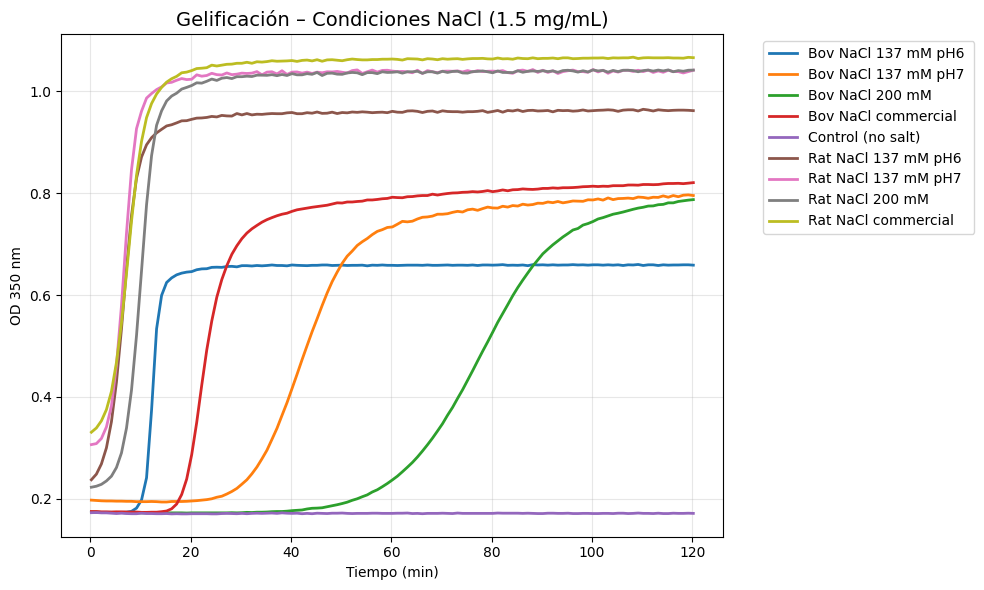

In [5]:
# =============================
# N a C l
# =============================
nacl_df = long_df[long_df["cond"].str.contains("NaCl") |
                  (long_df["cond"] == "Control (no salt)")]

nacl_mean = (
    nacl_df
    .groupby(["time_min", "cond"])["OD"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))

palette = plt.cm.tab20(range(nacl_mean["cond"].nunique()))

for i, (cond, sub) in enumerate(nacl_mean.groupby("cond")):
    sub = sub.sort_values("time_min")
    plt.plot(sub["time_min"], sub["OD"],
             label=cond,
             linewidth=2)

plt.title("Gelificación – Condiciones NaCl (1.5 mg/mL)", fontsize=14)
plt.xlabel("Tiempo (min)")
plt.ylabel("OD 350 nm")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


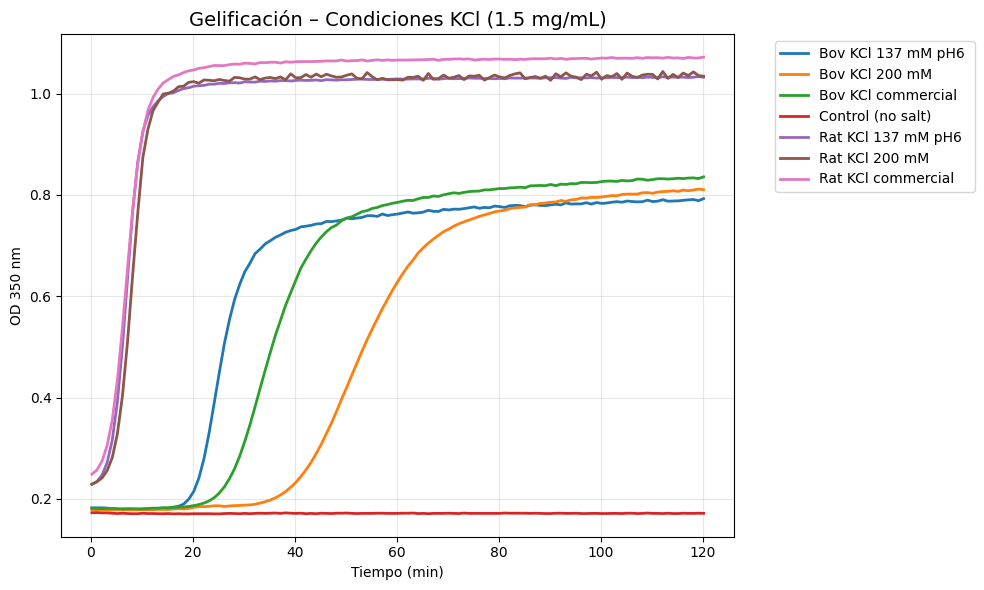

In [6]:
# =============================
# K C l  +  Control
# =============================

kcl_df = long_df[
    long_df["cond"].str.contains("KCl") |
    (long_df["cond"] == "Control (no salt)")
]

kcl_mean = (
    kcl_df
    .groupby(["time_min", "cond"])["OD"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))

palette = plt.cm.tab20(range(kcl_mean["cond"].nunique()))

for i, (cond, sub) in enumerate(kcl_mean.groupby("cond")):
    sub = sub.sort_values("time_min")
    plt.plot(sub["time_min"], sub["OD"],
             label=cond,
             linewidth=2)

plt.title("Gelificación – Condiciones KCl (1.5 mg/mL)", fontsize=14)
plt.xlabel("Tiempo (min)")
plt.ylabel("OD 350 nm")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [7]:
def get_style(cond_name):

    # ====================
    # COLOR por especie
    # ====================
    if cond_name.startswith("Bov "):
        base_color = "red"
    elif cond_name.startswith("Rat "):
        base_color = "blue"
    else:
        base_color = "black"

    # ====================
    # OSCURECER si es pH 7
    # ====================
    if "pH7" in cond_name or "pH 7" in cond_name:
        # colores más oscuros
        if base_color == "red":
            color = "#7f0000"   # rojo oscuro
        elif base_color == "blue":
            color = "#00007f"   # azul oscuro
        else:
            color = "black"
    else:
        color = base_color

    # ====================
    # ESTILO de línea
    # ====================
    if "137 mM" in cond_name:
        linestyle = "-"
    elif "200 mM" in cond_name:
        linestyle = "--"
    elif "commercial" in cond_name.lower():
        linestyle = ":"
    elif "Control" in cond_name:
        linestyle = "-"
    else:
        linestyle = "-"

    return color, linestyle


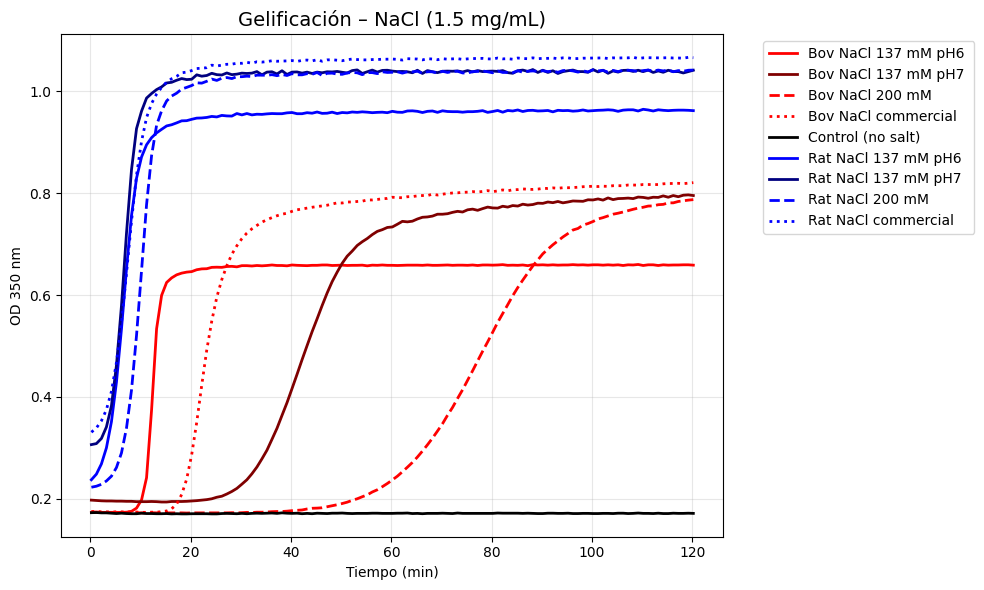

In [8]:
plt.figure(figsize=(10, 6))

for cond, sub in nacl_mean.groupby("cond"):
    sub = sub.sort_values("time_min")
    color, linestyle = get_style(cond)
    plt.plot(
        sub["time_min"], sub["OD"],
        label=cond,
        color=color,
        linestyle=linestyle,
        linewidth=2
    )

plt.title("Gelificación – NaCl (1.5 mg/mL)", fontsize=14)
plt.xlabel("Tiempo (min)")
plt.ylabel("OD 350 nm")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


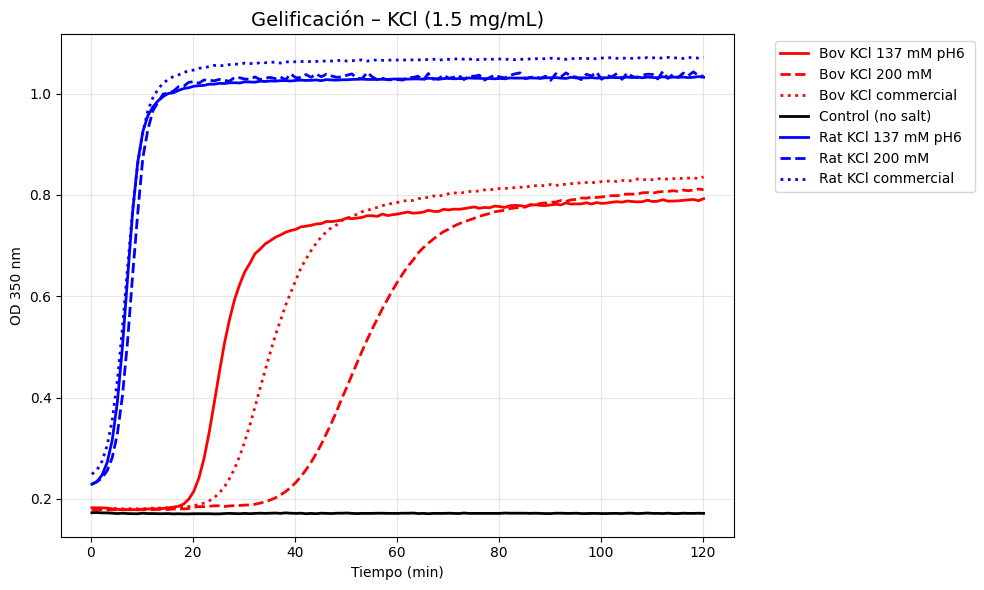

In [9]:
plt.figure(figsize=(10, 6))

for cond, sub in kcl_mean.groupby("cond"):
    sub = sub.sort_values("time_min")
    color, linestyle = get_style(cond)
    plt.plot(
        sub["time_min"], sub["OD"],
        label=cond,
        color=color,
        linestyle=linestyle,
        linewidth=2
    )

plt.title("Gelificación – KCl (1.5 mg/mL)", fontsize=14)
plt.xlabel("Tiempo (min)")
plt.ylabel("OD 350 nm")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [10]:
import matplotlib.pyplot as plt

# Color por especie + pH (pH7 más oscuro)
def get_color(species, pH_group):
    if species == "Bovine":
        base = "red"
        dark = "#7f0000"
    elif species == "Rat":
        base = "blue"
        dark = "#00007f"
    else:
        return "black"

    if "pH 7" in pH_group or "pH7" in pH_group:
        return dark
    else:
        return base

# Estilo de línea por tipo de sal
def get_ls(salt):
    if salt == "NaCl":
        return "-"
    elif salt == "KCl":
        return "--"
    else:
        return "-."


# Función genérica: NaCl vs KCl en un panel
def plot_pair(df_sub, title):
    # media de réplicas de pozo
    pair_mean = (
        df_sub
        .groupby(["time_min", "species", "salt", "pH_group"])["OD"]
        .mean()
        .reset_index()
    )

    plt.figure(figsize=(7,5))
    used_labels = set()

    for (species, salt, pH), sub in pair_mean.groupby(["species", "salt", "pH_group"]):
        sub = sub.sort_values("time_min")
        color = get_color(species, pH)
        ls = get_ls(salt)
        label = f"{species} {salt}"

        # para que en la leyenda no se repita el mismo texto
        if label in used_labels:
            lbl = None
        else:
            lbl = label
            used_labels.add(label)

        plt.plot(
            sub["time_min"], sub["OD"],
            color=color,
            linestyle=ls,
            linewidth=2,
            label=lbl
        )

    plt.title(title, fontsize=13)
    plt.xlabel("Tiempo (min)")
    plt.ylabel("OD 350 nm")
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
    plt.tight_layout()
    plt.show()


In [11]:
def get_conc(cond):
    if "137" in cond:
        return "137 mM"
    elif "200" in cond:
        return "200 mM"
    elif "Com" in cond or "commercial" in cond.lower():
        return "Commercial"
    else:
        return "None"

def get_species(cond):
    if "Bov" in cond:
        return "Bovine"
    elif "Rat" in cond:
        return "Rat"
    else:
        return "Unknown"

def get_salt(cond):
    if "NaCl" in cond:
        return "NaCl"
    elif "KCl" in cond:
        return "KCl"
    else:
        return "None"

def get_pH(cond):
    if "pH 7" in cond or "pH7" in cond:
        return "pH 7"
    elif "pH 6" in cond or "pH6" in cond:
        return "pH 6"
    else:
        return "unaltered/NA"

long_df["conc"] = long_df["cond"].apply(get_conc)
long_df["species"] = long_df["cond"].apply(get_species)
long_df["salt"] = long_df["cond"].apply(get_salt)
long_df["pH_group"] = long_df["cond"].apply(get_pH)


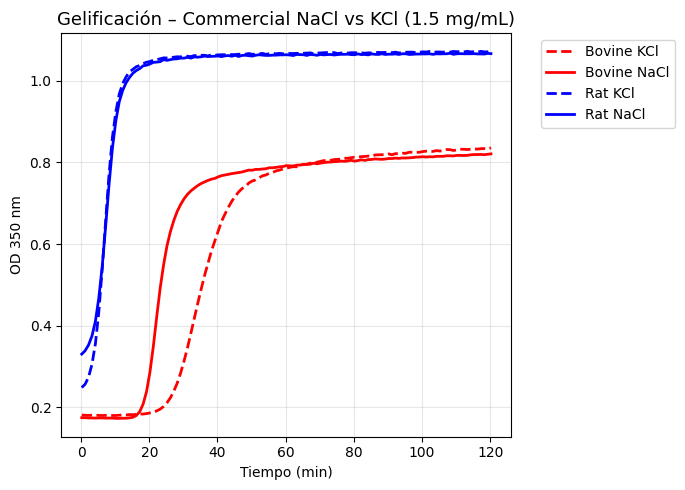

In [12]:
mask_com = (
    (long_df["conc"] == "Commercial") &
    (long_df["salt"].isin(["NaCl", "KCl"]))
)

plot_pair(long_df[mask_com],
          "Gelificación – Commercial NaCl vs KCl (1.5 mg/mL)")


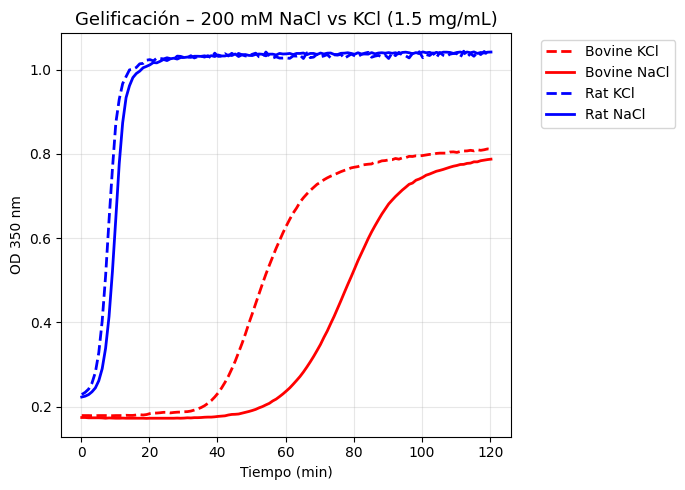

In [13]:
mask_200 = (
    (long_df["conc"] == "200 mM") &
    (long_df["salt"].isin(["NaCl", "KCl"]))
)

plot_pair(long_df[mask_200],
          "Gelificación – 200 mM NaCl vs KCl (1.5 mg/mL)")


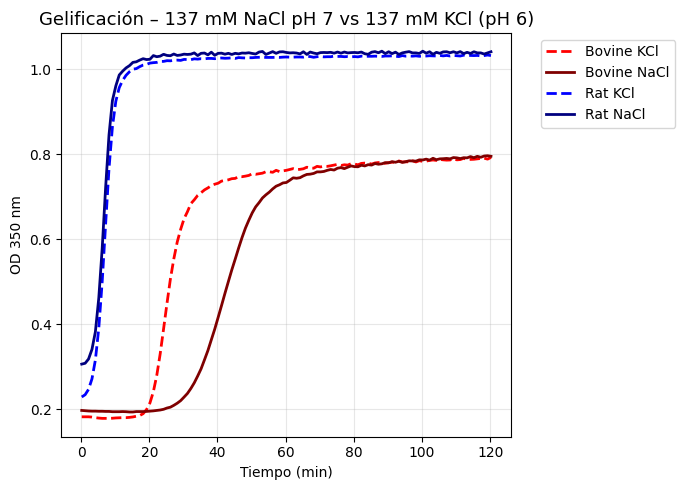

In [14]:
mask_137_pH7_vs_KCl = (
    (
        (long_df["salt"] == "NaCl") &
        (long_df["conc"] == "137 mM") &
        (long_df["pH_group"] == "pH 7")
    ) |
    (
        (long_df["salt"] == "KCl") &
        (long_df["conc"] == "137 mM") &
        (long_df["pH_group"] == "pH 6")
    )
)

plot_pair(long_df[mask_137_pH7_vs_KCl],
          "Gelificación – 137 mM NaCl pH 7 vs 137 mM KCl (pH 6)")


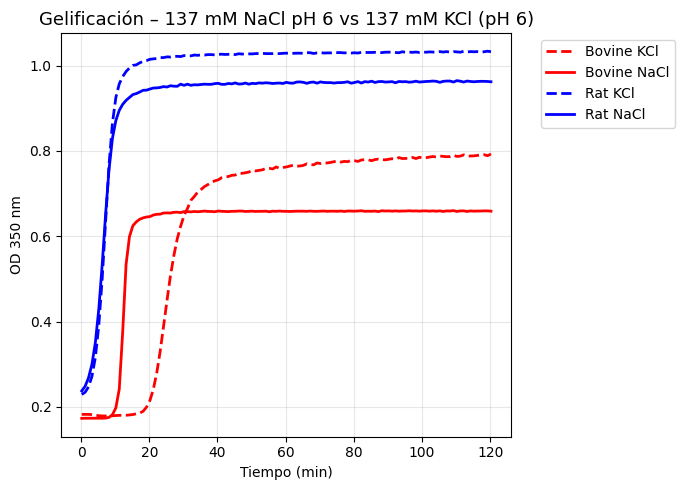

In [15]:
mask_137_pH6_vs_KCl = (
    (
        (long_df["salt"] == "NaCl") &
        (long_df["conc"] == "137 mM") &
        (long_df["pH_group"] == "pH 6")
    ) |
    (
        (long_df["salt"] == "KCl") &
        (long_df["conc"] == "137 mM") &
        (long_df["pH_group"] == "pH 6")
    )
)

plot_pair(long_df[mask_137_pH6_vs_KCl],
          "Gelificación – 137 mM NaCl pH 6 vs 137 mM KCl (pH 6)")


In [16]:
import matplotlib.pyplot as plt
import numpy as np

def get_color(species, pH_group):
    # colores suaves + pH7 más oscuro
    if species == "Bovine":
        base = "#d55e5e"    # rojo suave
        dark = "#7f0000"    # rojo oscuro pH7
    elif species == "Rat":
        base = "#5e8ad5"    # azul suave
        dark = "#00007f"    # azul oscuro pH7
    else:
        return "black"

    if "pH 7" in pH_group or "pH7" in pH_group:
        return dark
    else:
        return base

def get_ls_conc(conc, is_control=False):
    if is_control or conc in ["None", None]:
        return "-"
    if conc == "137 mM":
        return "-"
    elif conc == "200 mM":
        return "--"
    elif conc == "Commercial":
        return ":"
    else:
        return "-"


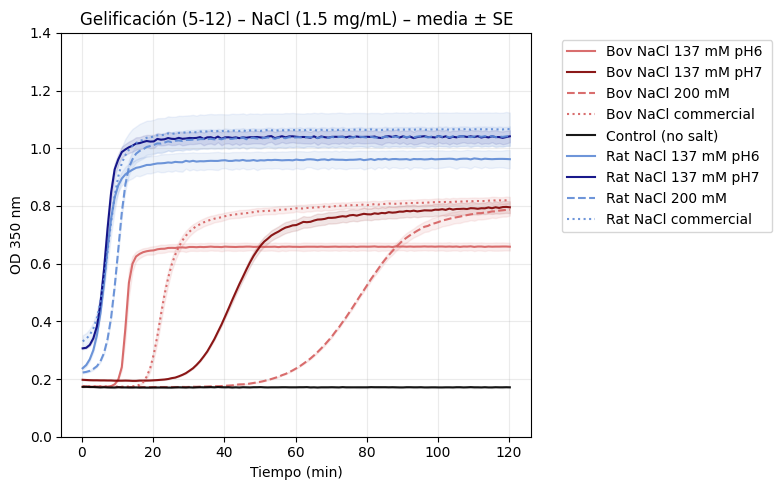

In [45]:
# --- filtrar NaCl + control ---
nacl_df = long_df[
    (long_df["salt"] == "NaCl") |
    (long_df["cond"] == "Control (no salt)")
]

# stats por tiempo y condición
nacl_stats = (
    nacl_df
    .groupby(["time_min", "cond", "species", "conc", "pH_group"])["OD"]
    .agg(["mean", "sem"])
    .reset_index()
)

plt.figure(figsize=(8,5))
used_labels = set()

for cond, sub in nacl_stats.groupby("cond"):
    sub = sub.sort_values("time_min")
    species = sub["species"].iloc[0]
    conc    = sub["conc"].iloc[0]
    pH      = sub["pH_group"].iloc[0]

    is_control = "Control" in cond
    color = "black" if is_control else get_color(species, pH)
    ls    = get_ls_conc(conc, is_control=is_control)

    label = cond
    if label in used_labels:
        label = None
    else:
        used_labels.add(label)

    # línea principal suave
    plt.plot(sub["time_min"], sub["mean"],
             color=color, linestyle=ls,
             linewidth=1.5, alpha=0.9,
             label=label)

    # sombra muy suave
    plt.fill_between(sub["time_min"],
                     sub["mean"] - sub["sem"],
                     sub["mean"] + sub["sem"],
                     color=color, alpha=0.10)

plt.title("Gelificación (5-12) – NaCl (1.5 mg/mL) – media ± SE")
plt.xlabel("Tiempo (min)")
plt.ylabel("OD 350 nm")
plt.grid(True, alpha=0.25)
plt.ylim(0, 1.4)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


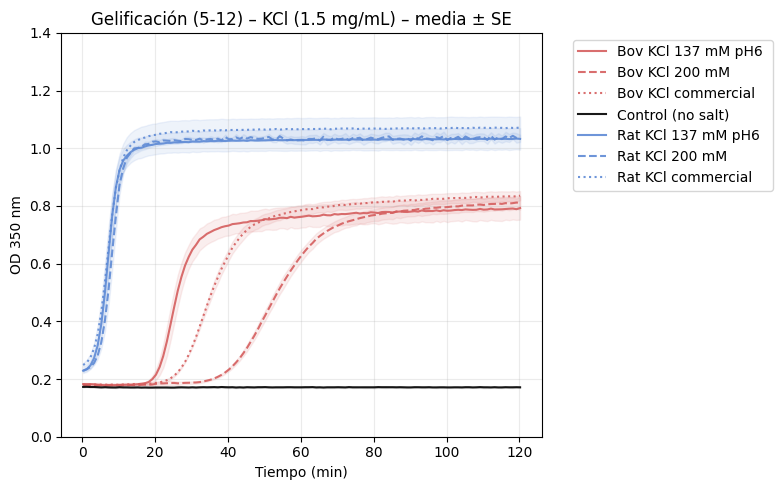

In [46]:
# --- filtrar KCl + control ---
kcl_df = long_df[
    (long_df["salt"] == "KCl") |
    (long_df["cond"] == "Control (no salt)")
]

kcl_stats = (
    kcl_df
    .groupby(["time_min", "cond", "species", "conc", "pH_group"])["OD"]
    .agg(["mean", "sem"])
    .reset_index()
)

plt.figure(figsize=(8,5))
used_labels = set()

for cond, sub in kcl_stats.groupby("cond"):
    sub = sub.sort_values("time_min")
    species = sub["species"].iloc[0]
    conc    = sub["conc"].iloc[0]
    pH      = sub["pH_group"].iloc[0]

    is_control = "Control" in cond
    color = "black" if is_control else get_color(species, pH)
    ls    = get_ls_conc(conc, is_control=is_control)

    label = cond
    if label in used_labels:
        label = None
    else:
        used_labels.add(label)

    plt.plot(sub["time_min"], sub["mean"],
             color=color, linestyle=ls,
             linewidth=1.5, alpha=0.9,
             label=label)

    plt.fill_between(sub["time_min"],
                     sub["mean"] - sub["sem"],
                     sub["mean"] + sub["sem"],
                     color=color, alpha=0.10)

plt.title("Gelificación (5-12) – KCl (1.5 mg/mL) – media ± SE")
plt.xlabel("Tiempo (min)")
plt.ylabel("OD 350 nm")
plt.grid(True, alpha=0.25)
plt.ylim(0, 1.4)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


In [33]:
def plot_pair(df_sub, title):
    # calcular media y SE
    stats = (
        df_sub
        .groupby(["time_min", "species", "salt", "conc", "pH_group"])["OD"]
        .agg(["mean", "sem"])
        .reset_index()
    )

    plt.figure(figsize=(8,5))
    used_labels = set()

    for (species, salt, conc, pH), sub in stats.groupby(["species", "salt", "conc", "pH_group"]):
        sub = sub.sort_values("time_min")

        # --- color por especie + pH ---
        color = get_color(species, pH)

        # --- estilo de línea por TIPO DE SAL ---
        if salt == "NaCl":
            ls = "-"
        elif salt == "KCl":
            ls = "--"
        else:
            ls = "-."

        label = f"{species} {salt} {conc}"
        if label in used_labels:
            label_plot = None
        else:
            label_plot = label
            used_labels.add(label)

        # línea principal (suave)
        plt.plot(sub["time_min"], sub["mean"],
                 color=color, linestyle=ls, linewidth=1.5,
                 alpha=0.9, label=label_plot)

        # banda media ± SE (suave)
        plt.fill_between(sub["time_min"],
                         sub["mean"] - sub["sem"],
                         sub["mean"] + sub["sem"],
                         color=color, alpha=0.10)

    plt.title(title)
    plt.xlabel("Tiempo (min)")
    plt.ylabel("OD 350 nm")
    plt.grid(True, alpha=0.25)
    plt.ylim(0, 1.4)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


In [34]:
import matplotlib.pyplot as plt
import numpy as np

def get_color(species, pH_group):
    # colores suaves + pH7 más oscuro
    if species == "Bovine":
        base = "#d55e5e"    # rojo suave
        dark = "#7f0000"    # rojo oscuro pH7
    elif species == "Rat":
        base = "#5e8ad5"    # azul suave
        dark = "#00007f"    # azul oscuro pH7
    else:
        return "black"

    if "pH 7" in pH_group or "pH7" in pH_group:
        return dark
    else:
        return base


In [35]:
def plot_pair(df_sub, title):
    # calcular media y SE
    stats = (
        df_sub
        .groupby(["time_min", "species", "salt", "conc", "pH_group"])["OD"]
        .agg(["mean", "sem"])
        .reset_index()
    )

    plt.figure(figsize=(8,5))
    used_labels = set()

    for (species, salt, conc, pH), sub in stats.groupby(["species", "salt", "conc", "pH_group"]):
        sub = sub.sort_values("time_min")

        # COLOR
        color = get_color(species, pH)

        # LÍNEA → depende del tipo de sal
        if salt == "NaCl":
            ls = "-"      # continua
        elif salt == "KCl":
            ls = "--"     # discontinua
        else:
            ls = "-."

        # quitar "unaltered/NA" de la etiqueta
        pH_label = "" if pH in ["unaltered/NA", "NA", None] else pH
        label = f"{species} {salt} {conc} {pH_label}".strip()

        if label in used_labels:
            label_plot = None
        else:
            label_plot = label
            used_labels.add(label)

        # LÍNEA PRINCIPAL
        plt.plot(sub["time_min"], sub["mean"],
                 color=color, linestyle=ls,
                 linewidth=1.5, alpha=0.9,
                 label=label_plot)

        # SOMBRA MEDIA ± SE
        plt.fill_between(sub["time_min"],
                         sub["mean"] - sub["sem"],
                         sub["mean"] + sub["sem"],
                         color=color, alpha=0.10)

    plt.title(title)
    plt.xlabel("Tiempo (min)")
    plt.ylabel("OD 350 nm")
    plt.grid(True, alpha=0.25)
    plt.ylim(0, 1.4)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


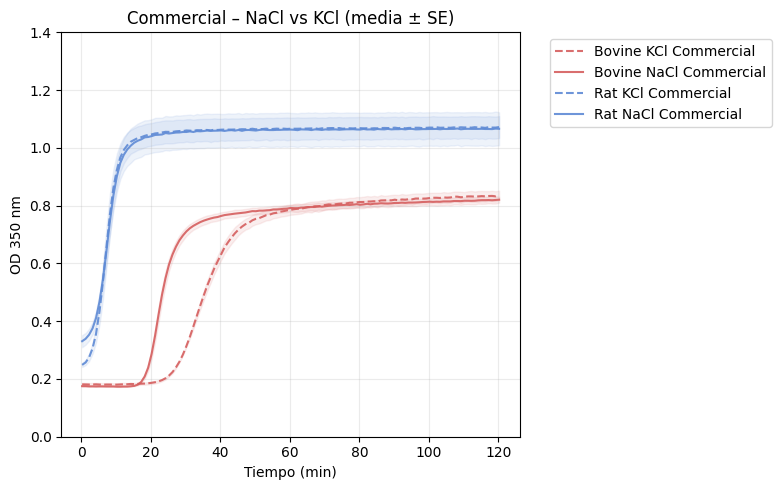

In [36]:
mask_commercial = (
    (long_df["conc"] == "Commercial") &
    (long_df["salt"].isin(["NaCl", "KCl"]))
)

plot_pair(long_df[mask_commercial],
          "Commercial – NaCl vs KCl (media ± SE)")


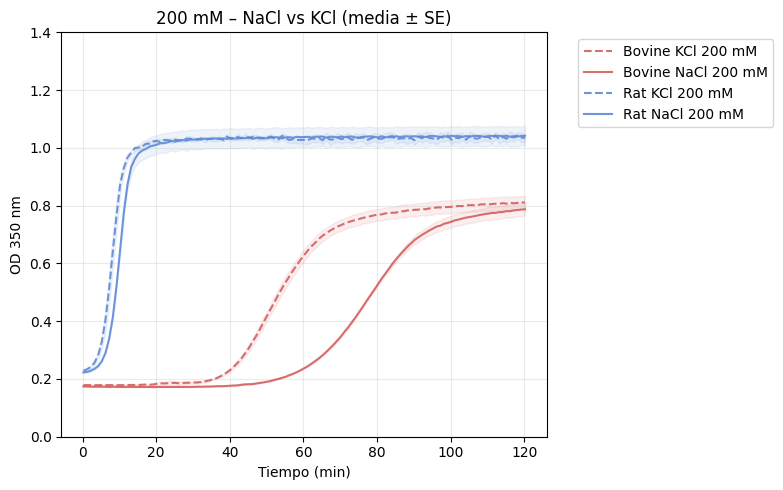

In [37]:
mask_200 = (
    (long_df["conc"] == "200 mM") &
    (long_df["salt"].isin(["NaCl", "KCl"]))
)

plot_pair(long_df[mask_200],
          "200 mM – NaCl vs KCl (media ± SE)")


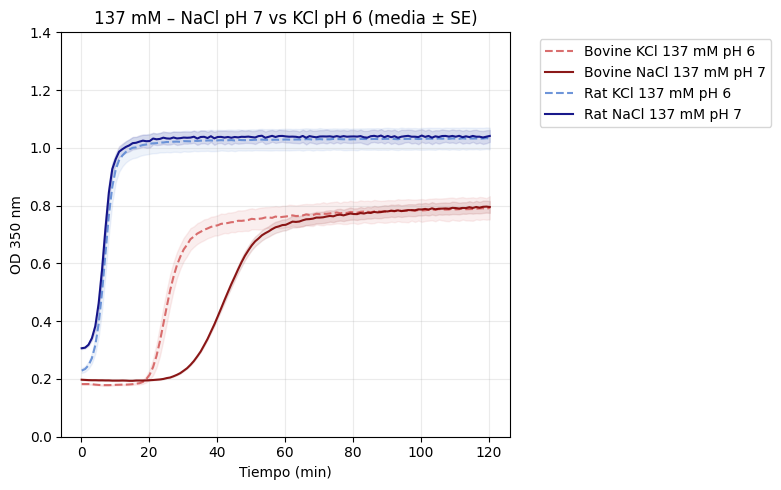

In [38]:
mask_137_pH7_vs_KCl = (
    (
        (long_df["salt"] == "NaCl") &
        (long_df["conc"] == "137 mM") &
        (long_df["pH_group"] == "pH 7")
    )
    |
    (
        (long_df["salt"] == "KCl") &
        (long_df["conc"] == "137 mM") &
        (long_df["pH_group"] == "pH 6")
    )
)

plot_pair(long_df[mask_137_pH7_vs_KCl],
          "137 mM – NaCl pH 7 vs KCl pH 6 (media ± SE)")


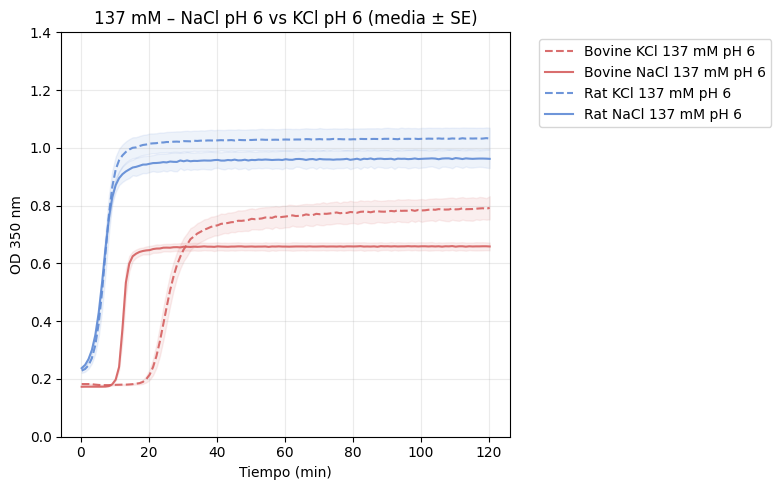

In [39]:
mask_137_pH6_vs_KCl = (
    (
        (long_df["salt"] == "NaCl") &
        (long_df["conc"] == "137 mM") &
        (long_df["pH_group"] == "pH 6")
    )
    |
    (
        (long_df["salt"] == "KCl") &
        (long_df["conc"] == "137 mM") &
        (long_df["pH_group"] == "pH 6")
    )
)

plot_pair(long_df[mask_137_pH6_vs_KCl],
          "137 mM – NaCl pH 6 vs KCl pH 6 (media ± SE)")


In [40]:
import matplotlib.pyplot as plt
import numpy as np

def get_color(species, pH_group):
    # colores suaves + pH7 más oscuro
    if species == "Bovine":
        base = "#d55e5e"    # rojo suave
        dark = "#7f0000"    # rojo oscuro pH7
    elif species == "Rat":
        base = "#5e8ad5"    # azul suave
        dark = "#00007f"    # azul oscuro pH7
    else:
        return "black"

    if "pH 7" in pH_group or "pH7" in pH_group:
        return dark
    else:
        return base


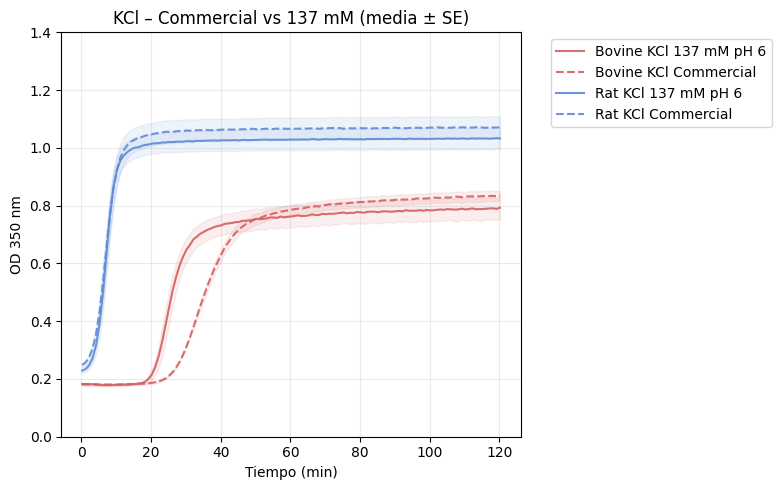

In [41]:
# --- filtrar solo KCl, Commercial y 137 mM ---
kcl_sub = long_df[
    (long_df["salt"] == "KCl") &
    (long_df["conc"].isin(["Commercial", "137 mM"]))
]

kcl_stats = (
    kcl_sub
    .groupby(["time_min", "species", "conc", "pH_group"])["OD"]
    .agg(["mean", "sem"])
    .reset_index()
)

plt.figure(figsize=(8,5))
used_labels = set()

for (species, conc, pH), sub in kcl_stats.groupby(["species", "conc", "pH_group"]):
    sub = sub.sort_values("time_min")

    color = get_color(species, pH)

    if conc == "137 mM":
        ls = "-"     # continua
    elif conc == "Commercial":
        ls = "--"    # discontinua
    else:
        ls = "-"

    # quitar "unaltered/NA" de la etiqueta
    pH_label = "" if pH in ["unaltered/NA", "NA", None] else pH
    label = f"{species} KCl {conc} {pH_label}".strip()

    if label in used_labels:
        label_plot = None
    else:
        label_plot = label
        used_labels.add(label)

    plt.plot(sub["time_min"], sub["mean"],
             color=color, linestyle=ls,
             linewidth=1.5, alpha=0.9,
             label=label_plot)

    plt.fill_between(sub["time_min"],
                     sub["mean"] - sub["sem"],
                     sub["mean"] + sub["sem"],
                     color=color, alpha=0.10)

plt.title("KCl – Commercial vs 137 mM (media ± SE)")
plt.xlabel("Tiempo (min)")
plt.ylabel("OD 350 nm")
plt.grid(True, alpha=0.25)
plt.ylim(0, 1.4)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


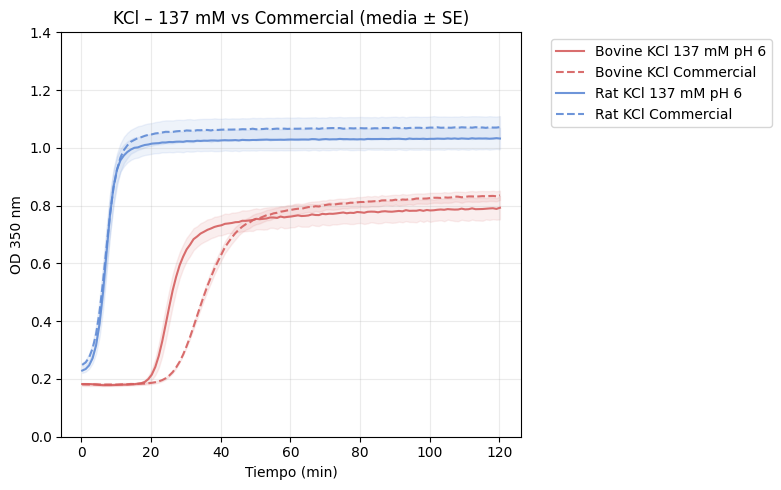

In [42]:
# --- KCl: Commercial vs 137 mM ---

kcl_sub = long_df[
    (long_df["salt"] == "KCl") &
    (long_df["conc"].isin(["Commercial", "137 mM"]))
]

kcl_stats = (
    kcl_sub
    .groupby(["time_min", "species", "conc", "pH_group"])["OD"]
    .agg(["mean", "sem"])
    .reset_index()
)

plt.figure(figsize=(8,5))
used_labels = set()

for (species, conc, pH), sub in kcl_stats.groupby(["species", "conc", "pH_group"]):
    sub = sub.sort_values("time_min")

    color = get_color(species, pH)

    # 137 continua, Commercial discontinua
    if conc == "137 mM":
        ls = "-"
    elif conc == "Commercial":
        ls = "--"
    else:
        ls = "-"

    # quitar NA de la etiqueta de pH
    pH_label = "" if pH in ["unaltered/NA", "NA", None, ""] else pH
    label = f"{species} KCl {conc} {pH_label}".strip()

    if label in used_labels:
        label_plot = None
    else:
        label_plot = label
        used_labels.add(label)

    plt.plot(sub["time_min"], sub["mean"],
             color=color, linestyle=ls,
             linewidth=1.5, alpha=0.9,
             label=label_plot)

    plt.fill_between(sub["time_min"],
                     sub["mean"] - sub["sem"],
                     sub["mean"] + sub["sem"],
                     color=color, alpha=0.10)

plt.title("KCl – 137 mM vs Commercial (media ± SE)")
plt.xlabel("Tiempo (min)")
plt.ylabel("OD 350 nm")
plt.grid(True, alpha=0.25)
plt.ylim(0, 1.4)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


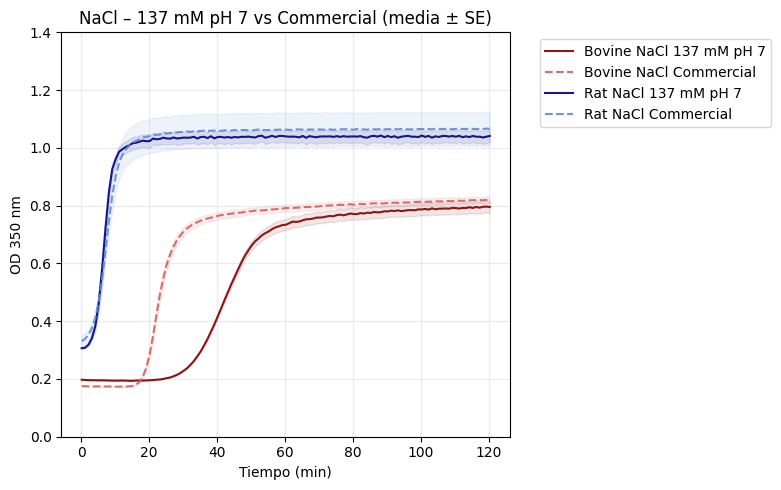

In [43]:
# --- NaCl: 137 mM pH 7 vs Commercial ---

nacl_sub_pH7 = long_df[
    (long_df["salt"] == "NaCl") &
    (
        (long_df["conc"] == "Commercial") |
        ((long_df["conc"] == "137 mM") & (long_df["pH_group"] == "pH 7"))
    )
]

nacl_stats_pH7 = (
    nacl_sub_pH7
    .groupby(["time_min", "species", "conc", "pH_group"])["OD"]
    .agg(["mean", "sem"])
    .reset_index()
)

plt.figure(figsize=(8,5))
used_labels = set()

for (species, conc, pH), sub in nacl_stats_pH7.groupby(["species", "conc", "pH_group"]):
    sub = sub.sort_values("time_min")

    color = get_color(species, pH)

    if conc == "137 mM":
        ls = "-"
    elif conc == "Commercial":
        ls = "--"
    else:
        ls = "-"

    pH_label = "" if pH in ["unaltered/NA", "NA", None, ""] else pH
    label = f"{species} NaCl {conc} {pH_label}".strip()

    if label in used_labels:
        label_plot = None
    else:
        label_plot = label
        used_labels.add(label)

    plt.plot(sub["time_min"], sub["mean"],
             color=color, linestyle=ls,
             linewidth=1.5, alpha=0.9,
             label=label_plot)

    plt.fill_between(sub["time_min"],
                     sub["mean"] - sub["sem"],
                     sub["mean"] + sub["sem"],
                     color=color, alpha=0.10)

plt.title("NaCl – 137 mM pH 7 vs Commercial (media ± SE)")
plt.xlabel("Tiempo (min)")
plt.ylabel("OD 350 nm")
plt.grid(True, alpha=0.25)
plt.ylim(0, 1.4)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


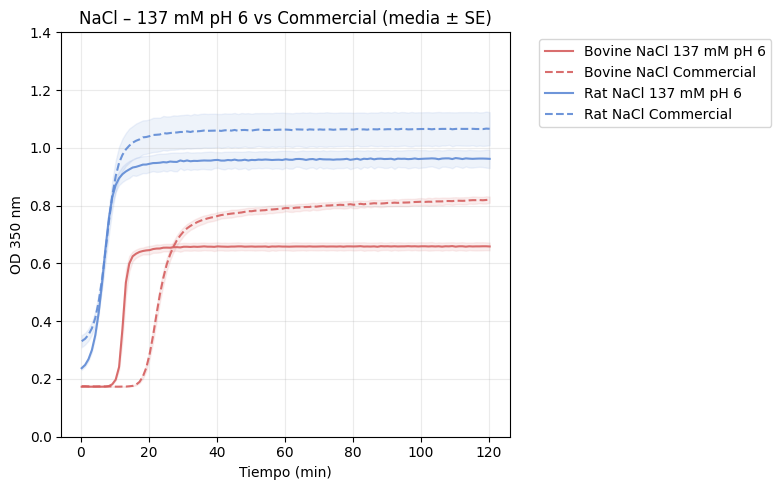

In [44]:
# --- NaCl: 137 mM pH 6 vs Commercial ---

nacl_sub_pH6 = long_df[
    (long_df["salt"] == "NaCl") &
    (
        (long_df["conc"] == "Commercial") |
        ((long_df["conc"] == "137 mM") & (long_df["pH_group"] == "pH 6"))
    )
]

nacl_stats_pH6 = (
    nacl_sub_pH6
    .groupby(["time_min", "species", "conc", "pH_group"])["OD"]
    .agg(["mean", "sem"])
    .reset_index()
)

plt.figure(figsize=(8,5))
used_labels = set()

for (species, conc, pH), sub in nacl_stats_pH6.groupby(["species", "conc", "pH_group"]):
    sub = sub.sort_values("time_min")

    color = get_color(species, pH)

    if conc == "137 mM":
        ls = "-"
    elif conc == "Commercial":
        ls = "--"
    else:
        ls = "-"

    pH_label = "" if pH in ["unaltered/NA", "NA", None, ""] else pH
    label = f"{species} NaCl {conc} {pH_label}".strip()

    if label in used_labels:
        label_plot = None
    else:
        label_plot = label
        used_labels.add(label)

    plt.plot(sub["time_min"], sub["mean"],
             color=color, linestyle=ls,
             linewidth=1.5, alpha=0.9,
             label=label_plot)

    plt.fill_between(sub["time_min"],
                     sub["mean"] - sub["sem"],
                     sub["mean"] + sub["sem"],
                     color=color, alpha=0.10)

plt.title("NaCl – 137 mM pH 6 vs Commercial (media ± SE)")
plt.xlabel("Tiempo (min)")
plt.ylabel("OD 350 nm")
plt.grid(True, alpha=0.25)
plt.ylim(0, 1.4)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()
